In [1]:
#lirbaires will be imported where ever necessary

In [2]:
from pyspark.sql import SparkSession

In [3]:
#Datast link : https://www.kaggle.com/hellbuoy/car-price-prediction

In [4]:
#creating basic spark session
spark = SparkSession.builder.appName("Car_Price_Prediction").getOrCreate()

In [5]:
#Reading the Dataset

In [37]:
df=spark.read.csv('D://M. Tech in Data Science & Machine Learning//Big Data Analytics//Sem_Prep//Car_Price_Prediction//CarPrice_Assignment.csv',header=True,inferSchema=True)
df.show(2)#first 2 records

+------+---------+-------------------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+
|car_ID|symboling|            CarName|fueltype|aspiration|doornumber|    carbody|drivewheel|enginelocation|wheelbase|carlength|carwidth|carheight|curbweight|enginetype|cylindernumber|enginesize|fuelsystem|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|  price|
+------+---------+-------------------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+
|     1|        3| alfa-romero giulia|     gas|       std|       two|convertible|       rwd|         front|     88.6|    168.8|    64.1|     4

In [38]:
df.columns#columns in the dataset

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [39]:
df.printSchema()

root
 |-- car_ID: integer (nullable = true)
 |-- symboling: integer (nullable = true)
 |-- CarName: string (nullable = true)
 |-- fueltype: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- doornumber: string (nullable = true)
 |-- carbody: string (nullable = true)
 |-- drivewheel: string (nullable = true)
 |-- enginelocation: string (nullable = true)
 |-- wheelbase: double (nullable = true)
 |-- carlength: double (nullable = true)
 |-- carwidth: double (nullable = true)
 |-- carheight: double (nullable = true)
 |-- curbweight: integer (nullable = true)
 |-- enginetype: string (nullable = true)
 |-- cylindernumber: string (nullable = true)
 |-- enginesize: integer (nullable = true)
 |-- fuelsystem: string (nullable = true)
 |-- boreratio: double (nullable = true)
 |-- stroke: double (nullable = true)
 |-- compressionratio: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- peakrpm: integer (nullable = true)
 |-- citympg: integer (nullable = t

In [40]:
len(df.columns)#checking the length of the columns

26

In [41]:
#for column name and datatypes
df.dtypes

[('car_ID', 'int'),
 ('symboling', 'int'),
 ('CarName', 'string'),
 ('fueltype', 'string'),
 ('aspiration', 'string'),
 ('doornumber', 'string'),
 ('carbody', 'string'),
 ('drivewheel', 'string'),
 ('enginelocation', 'string'),
 ('wheelbase', 'double'),
 ('carlength', 'double'),
 ('carwidth', 'double'),
 ('carheight', 'double'),
 ('curbweight', 'int'),
 ('enginetype', 'string'),
 ('cylindernumber', 'string'),
 ('enginesize', 'int'),
 ('fuelsystem', 'string'),
 ('boreratio', 'double'),
 ('stroke', 'double'),
 ('compressionratio', 'double'),
 ('horsepower', 'int'),
 ('peakrpm', 'int'),
 ('citympg', 'int'),
 ('highwaympg', 'int'),
 ('price', 'double')]

In [42]:
#checking for null values

In [43]:
from pyspark.sql.functions import isnan, col, count, when

In [44]:
df.select([count(when(isnan(c) | col(c).isNull() , c)).alias(c) for c in df.columns]).show()

+------+---------+-------+--------+----------+----------+-------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-----+
|car_ID|symboling|CarName|fueltype|aspiration|doornumber|carbody|drivewheel|enginelocation|wheelbase|carlength|carwidth|carheight|curbweight|enginetype|cylindernumber|enginesize|fuelsystem|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|price|
+------+---------+-------+--------+----------+----------+-------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-----+
|     0|        0|      0|       0|         0|         0|      0|         0|             0|        0|        0|       0|        0|         0|         0|             0|         0|         0|       

In [45]:
#There are no null values

In [46]:
#Dropping some unwanted columns (car_ID , CarName)
df=df.drop('CarName','car_ID')
df.columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [47]:
#getting onlystring columns
string_col = [c for c,t in df.dtypes if t=='string']
string_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [48]:
#getting only numeric  columns
non_string_col = [c for c,t in df.dtypes if t!='string']
non_string_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [49]:
#Applying String indexer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

In [50]:
indexer = [StringIndexer(inputCol=c, outputCol=c+"indexed").fit(df) for c in string_col]
pipeline = Pipeline(stages=indexer)
df=pipeline.fit(df).transform(df)

In [51]:
df=df.drop('CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem')
df.show(2)

+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------+
|symboling|wheelbase|carlength|carwidth|carheight|curbweight|enginesize|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|  price|fueltypeindexed|aspirationindexed|doornumberindexed|carbodyindexed|drivewheelindexed|enginelocationindexed|enginetypeindexed|cylindernumberindexed|fuelsystemindexed|
+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------+
|        3|     88.6|    168.8|    64.1|     4

In [52]:
#applying vector indexer
from pyspark.ml.feature import VectorAssembler

In [53]:
df1=df.drop('price')
df1.show()

+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------+
|symboling|wheelbase|carlength|carwidth|carheight|curbweight|enginesize|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|fueltypeindexed|aspirationindexed|doornumberindexed|carbodyindexed|drivewheelindexed|enginelocationindexed|enginetypeindexed|cylindernumberindexed|fuelsystemindexed|
+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------+
|        3|     88.6|    168.8|    64.1|     48.8|      2548|       13

In [54]:
df1.printSchema()

root
 |-- symboling: integer (nullable = true)
 |-- wheelbase: double (nullable = true)
 |-- carlength: double (nullable = true)
 |-- carwidth: double (nullable = true)
 |-- carheight: double (nullable = true)
 |-- curbweight: integer (nullable = true)
 |-- enginesize: integer (nullable = true)
 |-- boreratio: double (nullable = true)
 |-- stroke: double (nullable = true)
 |-- compressionratio: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- peakrpm: integer (nullable = true)
 |-- citympg: integer (nullable = true)
 |-- highwaympg: integer (nullable = true)
 |-- fueltypeindexed: double (nullable = false)
 |-- aspirationindexed: double (nullable = false)
 |-- doornumberindexed: double (nullable = false)
 |-- carbodyindexed: double (nullable = false)
 |-- drivewheelindexed: double (nullable = false)
 |-- enginelocationindexed: double (nullable = false)
 |-- enginetypeindexed: double (nullable = false)
 |-- cylindernumberindexed: double (nullable = false)
 |-- fue

In [55]:
features=VectorAssembler(inputCols=df1.columns[:], outputCol='feature')
feature_vector=features.transform(df)

In [56]:
feature_vector.show()

+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------+--------------------+
|symboling|wheelbase|carlength|carwidth|carheight|curbweight|enginesize|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|    price|fueltypeindexed|aspirationindexed|doornumberindexed|carbodyindexed|drivewheelindexed|enginelocationindexed|enginetypeindexed|cylindernumberindexed|fuelsystemindexed|             feature|
+---------+---------+---------+--------+---------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------+---------------+-----------------+-----------------+--------------+-----------------+---------------------+-----------------+---------------------+-----------------

In [68]:
df2=feature_vector.select('feature','price')
df2.show()

+--------------------+---------+
|             feature|    price|
+--------------------+---------+
|[3.0,88.6,168.8,6...|  13495.0|
|[3.0,88.6,168.8,6...|  16500.0|
|[1.0,94.5,171.2,6...|  16500.0|
|(23,[0,1,2,3,4,5,...|  13950.0|
|[2.0,99.4,176.6,6...|  17450.0|
|[2.0,99.8,177.3,6...|  15250.0|
|[1.0,105.8,192.7,...|  17710.0|
|[1.0,105.8,192.7,...|  18920.0|
|[1.0,105.8,192.7,...|  23875.0|
|[0.0,99.5,178.2,6...|17859.167|
|[2.0,101.2,176.8,...|  16430.0|
|(23,[1,2,3,4,5,6,...|  16925.0|
|[0.0,101.2,176.8,...|  20970.0|
|[0.0,101.2,176.8,...|  21105.0|
|[1.0,103.5,189.0,...|  24565.0|
|[0.0,103.5,189.0,...|  30760.0|
|[0.0,103.5,193.8,...|  41315.0|
|[0.0,110.0,197.0,...|  36880.0|
|[2.0,88.4,141.1,6...|   5151.0|
|[1.0,94.5,155.9,6...|   6295.0|
+--------------------+---------+
only showing top 20 rows



In [57]:
#Applying Linear  Regression

In [ ]:
#REference : https://www.datatechnotes.com/2021/05/mllib-linear-regression-example-with.html

In [69]:
(trainingData, testData) = df2.randomSplit([0.8, 0.2],seed = 11)

In [70]:
from pyspark.ml.regression import LinearRegression

In [72]:
lr = LinearRegression(featuresCol = 'feature', labelCol='price')
lr_model = lr.fit(trainingData)
print("Coefficients: ", lr_model.coefficients)
print('')
print("Intercept: ", lr_model.intercept)

Coefficients:  [210.38160434642472,194.54681300924776,23.40959607672031,173.2545143971136,-59.68458400856881,3.7569979732981125,95.39412863749402,-1835.0262641134607,-3573.156753796841,-280.7375512224478,22.562400000487877,2.126350015402318,-146.96070964351188,249.0553871049187,5506.513565410933,739.3581737052903,315.77566483173626,-48.49166222525575,770.0717765973582,9961.184313863043,-931.8526851565122,2128.723124387396,-263.80099046783823]

Intercept:  -37700.672537408704


In [73]:
print("MSE: ", lr_model.summary.meanSquaredError)
print("MAE: ", lr_model.summary.meanAbsoluteError)
print("R-squared: ", lr_model.summary.r2) 

MSE:  6118467.1828925
MAE:  1770.84199139799
R-squared:  0.9110055801607931


In [ ]:
lr_model = lr.fit(trainingData)
results=lr_model.evaluate(trainingData)
print("MSE: ", results.meanSquaredError)
print("MAE: ", results.meanAbsoluteError)
print("R-squared: ", results.r2) 

In [74]:
mdata = lr_model.transform(df2)
mdata.show(3) 

+--------------------+-------+------------------+
|             feature|  price|        prediction|
+--------------------+-------+------------------+
|[3.0,88.6,168.8,6...|13495.0|10686.514523867008|
|[3.0,88.6,168.8,6...|16500.0|10686.514523867008|
|[1.0,94.5,171.2,6...|16500.0|  17477.2745744927|
+--------------------+-------+------------------+
only showing top 3 rows



In [75]:
x_ax = range(0, mdata.count())
y_pred = mdata.select("prediction").collect()
y_orig = mdata.select("price").collect()

In [77]:
import matplotlib.pyplot as plt

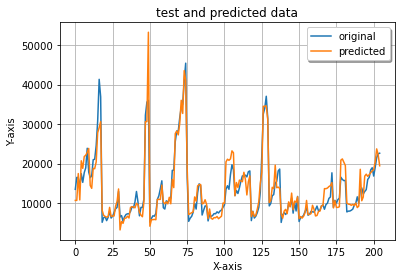

In [78]:
plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
# Stop session 
spark.stop() 

In [ ]:
#----------------------------------------------#----------------------------------------------------------#